In [1]:
import numpy as np
import sympy as sp
from IPython.display import *
import matplotlib.pyplot as plt
%matplotlib inline 
sp.init_printing(use_latex=True)

In [2]:
def f(t, y):
    return 1. - t + 4. * y

In [3]:
def F(y):
    return 1.125 * np.exp(4*y) + y/2. - 1/8

In [4]:
X0 = 0
F0 = 1
XF = 4

In [5]:
def plot(Ys, Xs, **kwargs):
    try:
        plt.plot(Xs, Ys, **kwargs)
    except ValueError:
        print("Ys.shape = ", Ys.shape, "; Xs.shape = ", Xs.shape)

In [6]:
def simple_euler(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        Ys[i+1] = Ys[i] + h*g(Xs[i], Ys[i])
    return Ys

In [7]:
def plot_results_for(M, with_n = [1e2]):
    for n in with_n:
        Xs = np.linspace(X0, XF, n)
        h = round(np.log10(abs(Xs[1] - Xs[0])), 2)
        TS = F(Xs)
        S = M(Xs = Xs)
        plt.figure(1)
        plot(S, Xs, label = 'solution ' + str(h))
        plt.figure(2)
        errs = np.absolute(S - TS)/TS
        plot(np.log10(errs[1:]), Xs = Xs[1:], label = 'solution ' + str(h))
    plt.figure(1)
    plot(TS, Xs, label = 'original')
    plt.title("Solution vs Original function")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    plt.figure(2)
    plt.title("log10 of global error")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

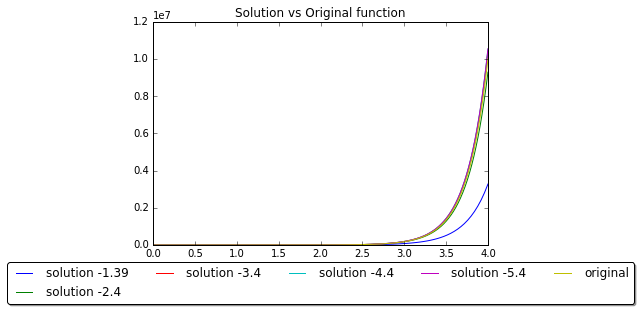

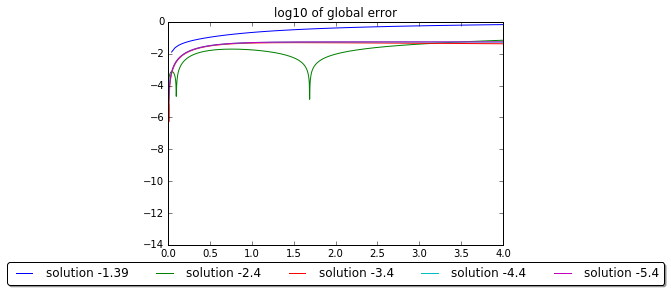

In [8]:
plot_results_for(simple_euler, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [9]:
def backward_euler_linear(Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    h = Xs[1] - X0
    Ys[0] = F0
    for i in range(N-1):
        Ys[i+1] = Ys[i] + h/(1-4*h)*f(Xs[i+1], Ys[i])
    return Ys

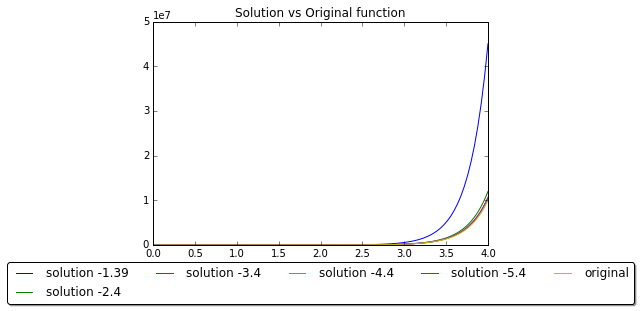

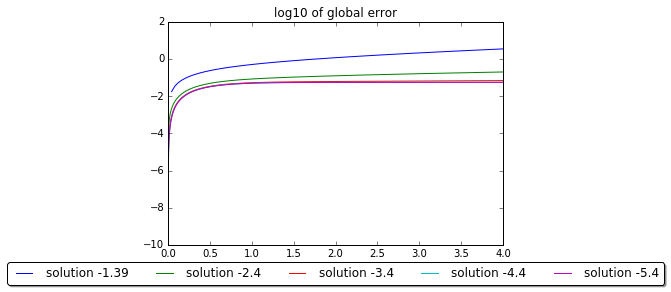

In [10]:
plot_results_for(backward_euler_linear, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [11]:
def trapezoidal_linear(Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    h = Xs[1] - X0
    Ys[0] = F0
    for i in range(N-1):
        Ys[i+1] = Ys[i] + h/(1-2*h)*(f(Xs[i+1], Ys[i])+h)
    return Ys

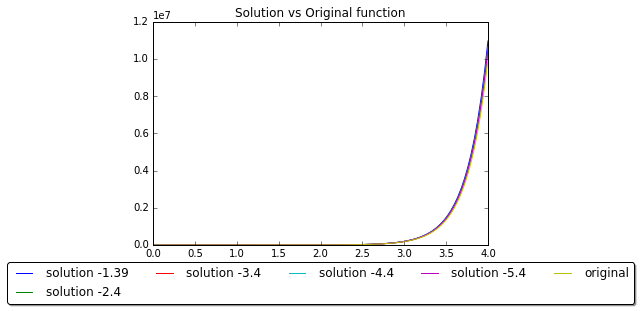

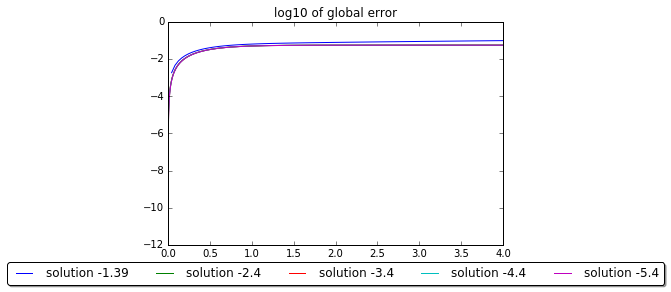

In [12]:
plot_results_for(trapezoidal_linear, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [13]:
def backward_euler_improved(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        Y_approx = Ys[i] + h*g(Xs[i], Ys[i])
        Ys[i+1] = Ys[i] + h*g(Xs[i+1], Y_approx)
    return Ys

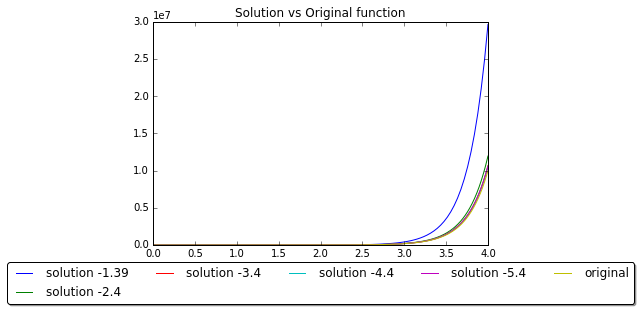

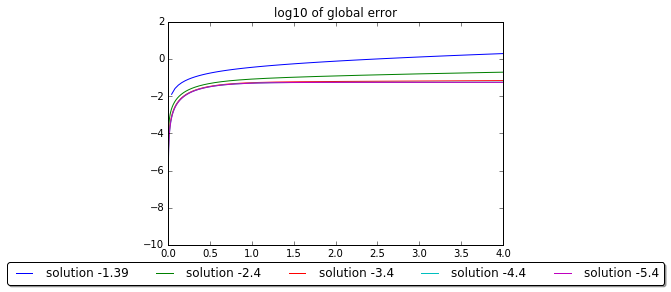

In [14]:
plot_results_for(backward_euler_improved, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [15]:
def trapezoidal_improved(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        Y_approx = Ys[i] + h*g(Xs[i], Ys[i])
        Ys[i+1] = Ys[i] + h/2 *(g(Xs[i+1], Y_approx) + g(Xs[i], Ys[i]))
    return Ys

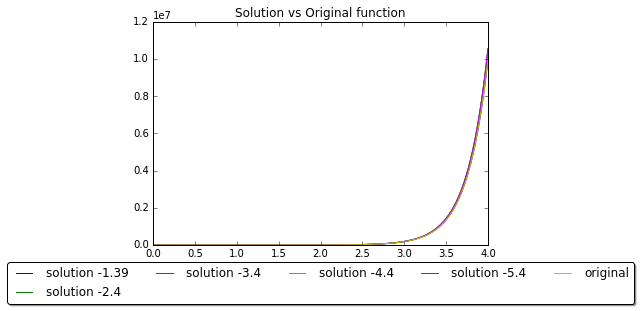

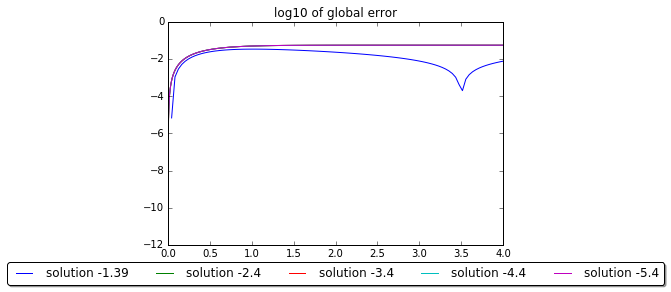

In [16]:
plot_results_for(trapezoidal_improved, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [17]:
def iterated_backward_euler_improved(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        Y_approx = Ys[i] + h*g(Xs[i], Ys[i])
        for _ in range(10):
            Y_approx = Ys[i] + h*g(Xs[i+1], Y_approx)
        Ys[i+1] = Y_approx
    return Ys

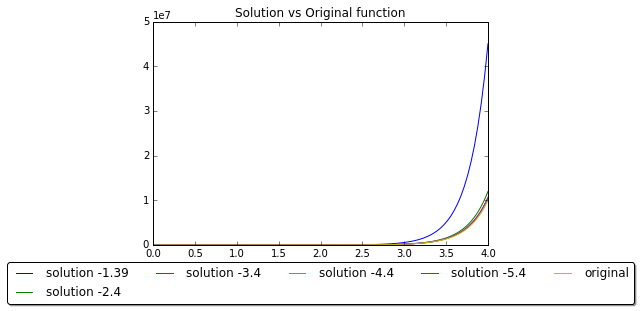

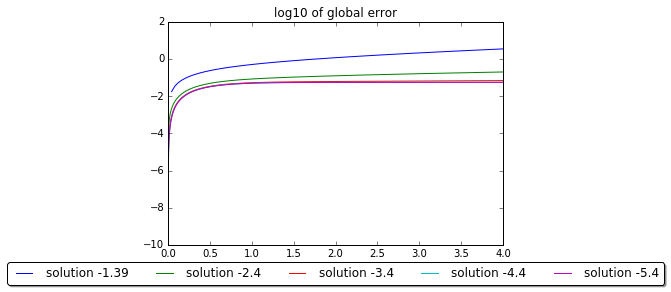

In [18]:
plot_results_for(iterated_backward_euler_improved, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [19]:
def iterated_trapezoidal_improved(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        Y_approx = Ys[i] + h*g(Xs[i], Ys[i])
        for _ in range(10):
            Y_approx = Ys[i] + h/2 *(g(Xs[i+1], Y_approx) + g(Xs[i], Ys[i]))
        Ys[i+1] = Y_approx
    return Ys

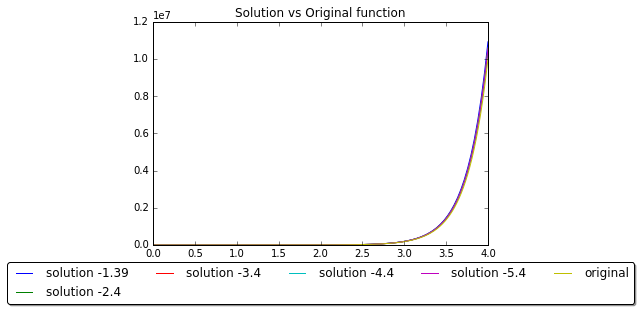

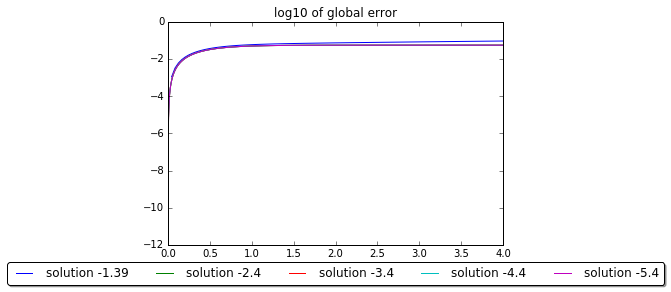

In [20]:
plot_results_for(iterated_trapezoidal_improved, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [21]:
def middle_point(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        k1 = h*g(Xs[i], Ys[1])
        k2 = h*g((Xs[i] + Xs[i+1])/2., Ys[i] + k1/2.)
        Ys[i+1] = Ys[i] + k2
    return Ys

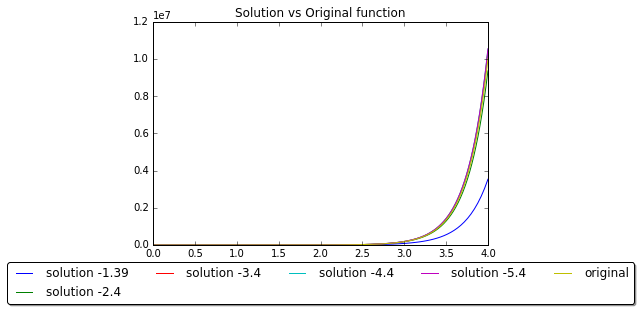

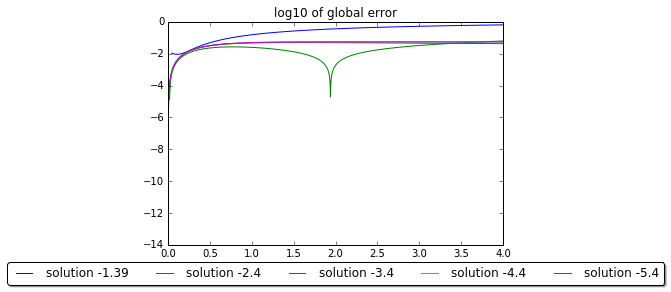

In [22]:
plot_results_for(middle_point, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [23]:
def runge_kutta(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros_like(Xs)
    Ys[0] = G0
    for i in range(N-1):
        k1 = h*g(Xs[i], Ys[i])
        k2 = h*g(Xs[i] + h/2., Ys[i] + k1/2.)
        k3 = h*g(Xs[i] + h/2., Ys[i] + k2/2.)
        k4 = h*g(Xs[i+1], Ys[i] + k3)
        Ys[i+1] = Ys[i] + 1./6 * k1 + 2./6 * k2 + 2./6 * k3 + 1./6 * k4
    return Ys

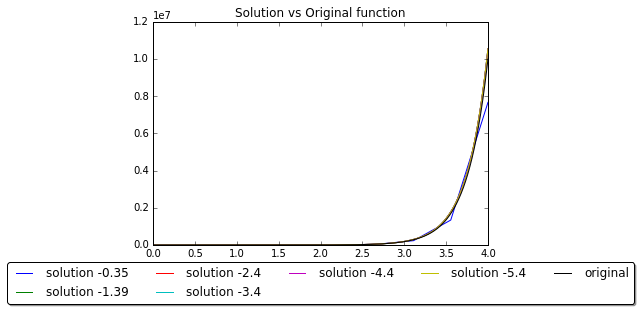

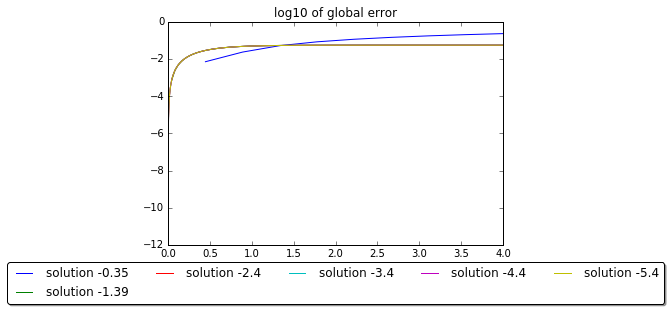

In [28]:
plot_results_for(runge_kutta, with_n = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6])